# The Sparks Foundation GRIP internship April 2023
## name =swaraj solanke 
## task1:Predict the percentage of an student based on the no. of study hours.

# importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os 


# reading dataset

In [4]:
df=pd.read_csv("New Text Document.txt", encoding='ISO-8859-1')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


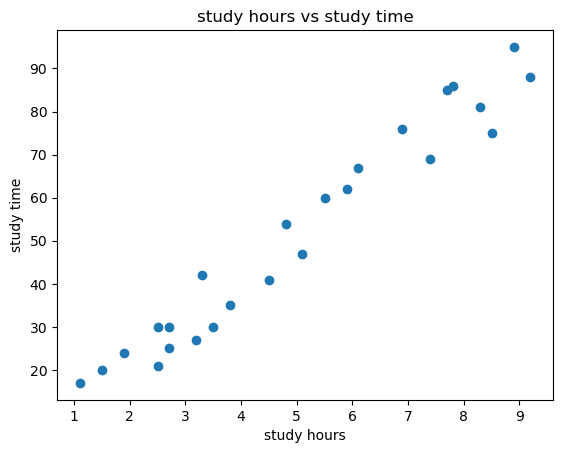

In [8]:
plt.scatter (x=df.Hours,y=df.Scores )
plt.xlabel("study hours")
plt.ylabel("study time")
plt.title("study hours vs study time")
plt.show()

# prepare the data for machine learning algorithm 

In [9]:
# data cleaning 
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
df.mean()

Hours      5.012
Scores    51.480
dtype: float64

In [11]:
data=df.fillna(df.mean())

In [12]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [13]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
# spliting the dataset for  training 
x=data.drop("Scores" ,axis="columns")
y=data.drop("Hours",axis="columns")
print("shape of x",x.shape )
print("shape of y",y.shape)

shape of x (25, 1)
shape of y (25, 1)


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=25)

In [17]:
print("shape of x train",x_train.shape)
print("shape of y train",y_train.shape)
print("shape of x test",x_test.shape)
print("shape of y test",y_test.shape)

shape of x train (22, 1)
shape of y train (22, 1)
shape of x test (3, 1)
shape of y test (3, 1)


# select a model and train it

In [18]:
# so in above scatter we have seen that x is increasing the value of y is also inreasing that's why we have to used linear regression 
from sklearn .linear_model import LinearRegression
lr=LinearRegression()

In [19]:
lr.fit(x_train,y_train)

LinearRegression()

In [20]:
lr.coef_

array([[9.665445]])

In [21]:
lr.intercept_

array([3.42319146])

In [22]:
m=9.66
c=3.42
y=m*12+c
y

119.34

In [23]:
lr.predict([[4]])[0][0].round(2)

C:\ancoda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


42.08

In [24]:
y_pred=lr.predict(x_test)
y_pred

array([[34.35261547],
       [29.51989297],
       [21.78753697]])

In [25]:
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=["Hours","Scores","Scores_predicated"])

,Hours,Scores,Scores_predicated
0,3.2,27.0,34.352615
1,2.7,25.0,29.519893
2,1.9,24.0,21.787537


# fine tunning  the model

In [26]:
lr.score(x_test,y_test)

-16.01115272797674

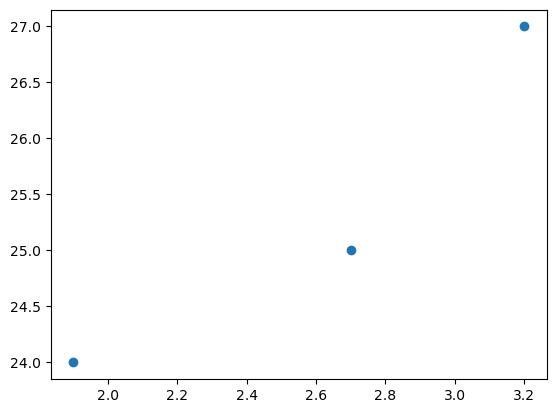

In [27]:
plt.scatter(x_test,y_test)

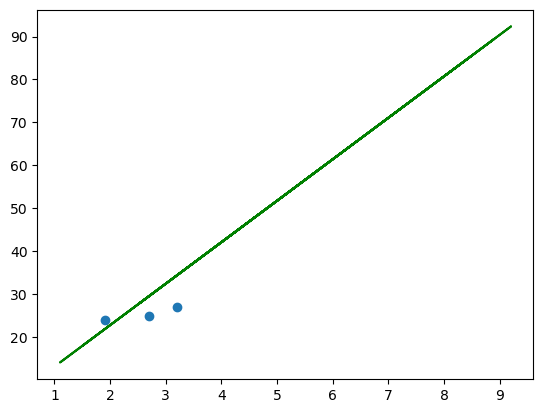

In [28]:
plt.scatter(x_test,y_test)
plt.plot(x_train,lr.predict(x_train),color="green")

In [29]:
import joblib
joblib.dump(lr,"Scores_predictor.pkl")


['Scores_predictor.pkl']

In [30]:
model=joblib.load("Scores_predictor.pkl")
model.predict([[5]])

C:\ancoda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[51.75041648]])